importing libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np


# Preprocessing data

preprocess training data

In [2]:
#diversify the data to avoid overfitting
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
training_set=train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary'
)


Found 8000 images belonging to 2 classes.


Preprocessing testset

In [3]:
test_datagen=ImageDataGenerator( #only rescaling as test data needs to remain as they are to avoid overfitting
    rescale=1/255
)
test_set=train_datagen.flow_from_directory(
    'dataset/test_set',
    target_size=(64,64),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


# Creating CNN

initialise CNN

In [4]:
cnn=tf.keras.models.Sequential()

1. convolutional layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3]))

2. Pooling

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

3. second Conolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

4. Flattening

In [8]:
cnn.add(tf.keras.layers.Flatten())

5. Full-connection

In [9]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

6. Output layer

In [10]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Training CNN

Compling CNN

In [11]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Training CNN on train set

In [12]:
cnn.fit(x=training_set,validation_data=test_set,epochs=20)

Epoch 1/20
250/250 [==============================] - 88s 348ms/step - loss: 0.6684 - accuracy: 0.5936 - val_loss: 0.6371 - val_accuracy: 0.6340
Epoch 2/20
250/250 [==============================] - 86s 343ms/step - loss: 0.5988 - accuracy: 0.6805 - val_loss: 0.5758 - val_accuracy: 0.6990
Epoch 3/20
250/250 [==============================] - 84s 337ms/step - loss: 0.5601 - accuracy: 0.7096 - val_loss: 0.6136 - val_accuracy: 0.6745
Epoch 4/20
250/250 [==============================] - 86s 345ms/step - loss: 0.5306 - accuracy: 0.7336 - val_loss: 0.5238 - val_accuracy: 0.7530
Epoch 5/20
250/250 [==============================] - 86s 342ms/step - loss: 0.4928 - accuracy: 0.7596 - val_loss: 0.5144 - val_accuracy: 0.7480
Epoch 6/20
250/250 [==============================] - 86s 342ms/step - loss: 0.4792 - accuracy: 0.7680 - val_loss: 0.4946 - val_accuracy: 0.7710
Epoch 7/20
250/250 [==============================] - 91s 365ms/step - loss: 0.4675 - accuracy: 0.7757 - val_loss: 0.5257 - val_ac

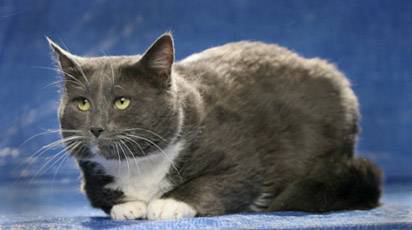

In [22]:
from IPython.display import display
from PIL import Image
path='dataset\single_prediction\cat_or_dog_7.jpg'
display(Image.open(path))

In [24]:
testimage=image.load_img('dataset\single_prediction\cat_or_dog_7.jpg',color_mode='rgb',target_size=(64,64))
testimage=image.img_to_array(testimage)
testimage=np.expand_dims(testimage,axis=0)# adding an extra dimension for batch as cnn takes data in batch of array
result=0
result=cnn.predict(testimage)
training_set.class_indices
if(result[0][0]==1):#result has batch dimesnsion and it has only one prediction
  prediction='dog'
else:
  prediction='cat'
print('the image is of',prediction)

the image is of cat
